# Olympic Events

*Author: Henry Truong*  
*Date: 2021-11-18*

## Introduction

### Synopsis

The purpose of this study is to understand and examine the dataset on ***Athletes and Results of 120 Years of Olympic History*** using the data analysis approach. A large part of tools applied in this study include ***Python*** and ***SQL*** to get and clean the data, to make queries to extract a certain piece of information of interest and to create visualization of the extracted data.

### Data

There are 3 csv files used in this study:
1. `athlete_events.csv`
2. `noc_regions.csv`
3. `city_regions.csv`

The first two csv files can be downloaded from Kaggle using [this link](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The metadata for these two files can also be found on this site.

The third csv file is created on my own and this file can be used to figure out if there is home advantages for the region hosting the Olympic event. This csv file contains 2 columns:
1. `City` column: The city of the Olympic event (which is present in `athlete_events.csv`)
2. `Host` column: The city's host region (which is not present in `athlete_events.csv`) 

### Content

The study has 3 main parts listed as following

1. Having Questions to Answer
2. Getting and Cleaning Data
3. Analyzing and Visualizing Data

## Having Questions to Answer


### 1. Questions related to regions and number of medals  
   1.1. Which region achieved most medals each year?  
   1.2. Which region achieved most Gold medals each year?
### 2. Questions related to athletes and number of medals  
   2.1. Which athlete achieved most medals?  
   2.2. Which athlete achieved most Gold medals?  
   2.3. Breakdown of medals of athletes with most medals  
   2.4. Is there any athlete who won medals in different sports?
### 3. Questions related to age/weight/height and number of medals?  
   3.1. In which age/weight/height range did athletes win medals?  
   3.2. What sports did athletes at low-extreme of age/weight/height range win?  
   3.3. What sports did athletes at high-extreme of age/weight/height range win?  
   3.4. Relationship of Weight and Height of medalists
### 4. Questions related to regions and number of events that regions participated in  
   4.1. Which region partcipated in highest number of events?  
   4.2. Relationship between number of events and number of medals
### 5. Questions related to genders and number of events that athletes participated in  
   5.1. Is there any change in gender trend?  
   5.2. What sport were females/males dominant in?

## Getting and Cleaning Data

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

### 2. Set up display options

Display options of `pandas`

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

Display options of `seaborn` and `matplotlib`

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 3. Load data

In [4]:
df_athlete_events = pd.read_csv('athlete_events.csv')
df_noc_regions = pd.read_csv('noc_regions.csv')
df_city_regions = pd.read_csv('city_regions.csv')

### 4. Understand data

The first 10 rows of the 3 above dataframes will be shown
1. `df_athlete_events` data
2. `df_noc_regions` data
3. `df_city_regions` data

In [6]:
df_athlete_events.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [7]:
df_noc_regions.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [8]:
df_city_regions.head(10)

,City,Host
0,Albertville,France
1,Amsterdam,Netherlands
2,Antwerpen,Belgium
3,Athina,Greece
4,Atlanta,USA
5,Barcelona,Spain
6,Beijing,China
7,Berlin,Germany
8,Calgary,Canada
9,Chamonix,France


### 5. Clean data

There are 2 main steps in cleaning data:
1. Checking if problems are present in the data  
    1.1. Data types  
    1.2. NULL values  
    1.3. Duplicated values
2. Processing the data

#### 5.1. For `df_athlete_events` dataframe:

Check data types and NULL values

In [11]:
df_athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Check duplicated rows

In [12]:
any(df_athlete_events.duplicated())

True

***Comments:***  
1. Data type: Data type of `Age` column can be changed to `int`
2. NULL values: 4 columns have NULL values:  
    2.1. `Age`: NULL values can be replaced by `0`  
    2.2. `Weight`: NULL values can be replaced by `0`  
    2.3. `Height`: NULL values can be replaced by `0`  
    2.4. `Medal`: NULL values can be replaced by `None
3. Duplicated values: There are duplicated rows

Process data

In [14]:
df_athlete_events[['Age', 'Weight', 'Height']] = df_athlete_events[['Age', 'Weight', 'Height']].fillna(0)
df_athlete_events[['Medal']] = df_athlete_events[['Medal']].fillna('None')
df_athlete_events.Age = df_athlete_events.Age.astype('int')
df_athlete_events.drop_duplicates(inplace=True)

#### 5.2. For `df_noc_regions` data

Check data types and NULL values

In [16]:
df_noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


Check duplicated rows

In [17]:
any(df_noc_regions.duplicated())

False

***Comments:***
1. Data type: No problems
2. NULL values: 2 columns have NULL values:  
    2.1. `region`: NULL values can be replaced by their corresponding values of `notes` column  
    2.2. `notes`: NULL values can be ignored
3. Duplicated values: There is no duplicated row

Find out why `region` column has NULL values and how to fix it 

In [19]:
df_noc_regions[df_noc_regions.region.isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


Process data

In [20]:
df_noc_regions.region[df_noc_regions.region.isna()] = df_noc_regions.notes[df_noc_regions.region.isna()]

#### 5.3. For `df_city_regions` data

Check data types and NULL values

In [22]:
df_city_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    42 non-null     object
 1   Host    42 non-null     object
dtypes: object(2)
memory usage: 800.0+ bytes


Check duplicated rows

In [23]:
any(df_city_regions.duplicated())

False

***Comments:***
1. Data type: No problems
2. NULL values: No problems
3. Duplicated values: There is no duplicated row

### 6. Get tidy complete data

#### 6.1. Merge all data together

Merge `df_athlete_events` and `df_noc_regions` without `Note` column using `NOC` column as the key

In [26]:
df = pd.merge(df_athlete_events, df_noc_regions[['NOC', 'region']], on='NOC', how='left')

Merge `df` and `df_city_regions` using `City` column as the key

In [27]:
df = pd.merge(df, df_city_regions, on='City', how='left')

***Note:*** The 2 codes above can be done using `sqldf` with sql queries

#### 6.2. Check the merged data 

Check data types and NULL values 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 269730
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  int32  
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   269731 non-null  object 
 15  region  269382 non-null  object 
 16  Host    269731 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(12)
memory usage: 36.0+ MB


Check duplicated rows

In [29]:
any(df.duplicated())

False

***Comments:***
1. Data type: No problems
2. NULL values: `region` column has NULL values  
    2.1. `region`: NULL values can be replaced by `'Singapore'`
3. Duplicated values: There is no duplicated row

#### 6.3. Process merged data to get tidy complete data 

Find out why `region` column has NULL values and how to fix it

In [31]:
df[df.region.isna()].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host
578,332,Zarinah Abdullah,F,21,0.0,0.0,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,None,NaN,Spain
579,332,Zarinah Abdullah,F,25,0.0,0.0,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,None,NaN,USA
2718,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,None,NaN,Brazil
7651,4264,Ang Peng Siong,M,21,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,None,NaN,USA
7652,4264,Ang Peng Siong,M,21,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,None,NaN,USA
7653,4264,Ang Peng Siong,M,21,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Butterfly,None,NaN,USA
7654,4264,Ang Peng Siong,M,21,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Medley Relay,None,NaN,USA
7655,4264,Ang Peng Siong,M,25,180.0,75.0,Singapore,SGP,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 50 metres Freestyle,None,NaN,South Korea
7656,4264,Ang Peng Siong,M,25,180.0,75.0,Singapore,SGP,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 100 metres Freestyle,None,NaN,South Korea
7657,4264,Ang Peng Siong,M,25,180.0,75.0,Singapore,SGP,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,None,NaN,South Korea


In [32]:
df.NOC[df.NOC == 'SGP'].value_counts()

SGP    349
Name: NOC, dtype: int64

In [33]:
df_noc_regions[df_noc_regions.region =='Singapore']

,NOC,region,notes
178,SIN,Singapore,NaN


***Comments:***
1. 349 NULL values in `region` column correspond to 349 rows with `NOC` column of `SGP`
2. The reason is the mismatch between `NOC` of `df_noc_regions` (SIN) and `NOC` of `df_athlete_events` (SGP)
3. `NaN` values in `region` column of `df` can be replaced by `'Singapore'`

Process data

In [35]:
df.region[df.NOC == 'SGP'] = 'Singapore'

C:\Users\Mr.Huy\AppData\Local\Temp/ipykernel_9512/1810047920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.region[df.NOC == 'SGP'] = 'Singapore'


***Note:*** `df` is the tidy complete data which will undergo the process of data analysis and data visualization

## Analyzing and Visualizing Data

***Note:*** This study largely focuses on summer events. Cases in which winter events or both events are evaluated will be clearly mentioned.

### 1. Questions related to regions and number of medals
   1.1. Which region achieved most medals each year?  
   1.2. Which region achieved most Gold medals each year?  
   1.3. Relationship between most medals and most Gold medals?  
   1.4. Was host region benificial from hosting events in terms of number of medals?

#### 1.1. Which region achieved most medals each year?

Extract a table `df_q11` from `df`, which contains 3 columns:  
1. year  
2. the region with most medals in that year  
3. the number of medals of that region  

In [39]:
df_q11 = sqldf('''
    SELECT
        Year,
        region,
        MAX(Medal_Counts) AS Medal_Counts
    FROM
        (SELECT 
            Year, 
            region, 
            COUNT(Medal) AS Medal_Counts
        FROM 
            df
        WHERE 
            (Medal <> 'None') 
            AND (Season = 'Summer')
        GROUP BY 
            Year, 
            region) AS temp_table
    GROUP BY
        Year
    ORDER BY
        Year
    ''')

Have a look at `df_q11`

In [40]:
df_q11.head(5)

,Year,region,Medal_Counts
0,1896,Greece,48
1,1900,France,225
2,1904,USA,394
3,1906,Greece,102
4,1908,UK,368
5,1912,Sweden,190
6,1920,USA,194
7,1924,USA,182
8,1928,USA,88
9,1932,USA,189


In [41]:
df_q11.tail(5)

,Year,region,Medal_Counts
19,1980,Russia,442
20,1984,USA,352
21,1988,Russia,300
22,1992,USA,224
23,1996,USA,259
24,2000,USA,242
25,2004,USA,263
26,2008,USA,317
27,2012,USA,248
28,2016,USA,264


In [42]:
df_q11.region.value_counts()

USA        15
Russia      7
Greece      2
Germany     2
France      1
UK          1
Sweden      1
Name: region, dtype: int64

***Note:*** There are only 7 different regions with most medals during the period from 1896 to 2016

Plot a piechart to find out the distribution of these 7 regions

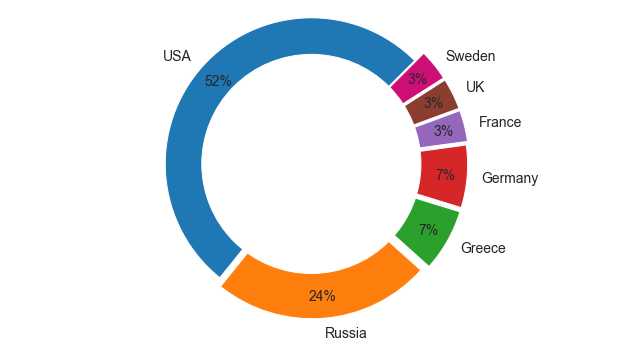

In [43]:
fig1, ax1 = plt.subplots()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8b3e2f', '#cd1076']
explode = (0.0, 0.06, 0.07, 0.07, 0.08, 0.08, 0.08)
ax1.pie(df_q11.region.value_counts(),
        colors=colors,
        explode=explode,
        labels=df_q11.region.value_counts().index,
        autopct='%.0f%%',
        pctdistance=0.85,
        labeldistance=1.1,
        startangle=45)
center_circle = plt.Circle((0, 0), 0.75, color='white')
ax1.add_artist(center_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

#### 1.2. Which region achieved most Gold medals each year?

Extract a table `df_q12` from `df`, which contains 3 columns:  
1. year  
2. the region with most Gold medals in that year  
3. the number of Gold medals of that region  

In [45]:
df_q12 = sqldf('''
    SELECT
        Year,
        region,
        MAX(Gold_Medal_Counts) AS Gold_Medal_Counts
    FROM
        (SELECT 
            Year, 
            region, 
            COUNT(Medal) AS Gold_Medal_Counts
        FROM 
            df
        WHERE 
            (Medal = 'Gold') 
            AND (Season = 'Summer')
        GROUP BY 
            Year, 
            region) AS temp_table
    GROUP BY
        Year
    ORDER BY
        Year
    ''')

Have a look at `df_q12`

In [46]:
df_q12.head(5)

,Year,region,Gold_Medal_Counts
19,1980,Russia,187
20,1984,USA,186
21,1988,Russia,134
22,1992,Russia,92
23,1996,USA,159
24,2000,USA,130
25,2004,USA,117
26,2008,USA,127
27,2012,USA,145
28,2016,USA,139


In [47]:
df_q12.tail(5)

,Year,region,Gold_Medal_Counts
19,1980,Russia,187
20,1984,USA,186
21,1988,Russia,134
22,1992,Russia,92
23,1996,USA,159
24,2000,USA,130
25,2004,USA,117
26,2008,USA,127
27,2012,USA,145
28,2016,USA,139


In [48]:
df_q12.region.value_counts()

USA        17
Russia      5
Germany     3
UK          2
Greece      1
Sweden      1
Name: region, dtype: int64

***Note:*** There are only 6 different regions with most Gold medals during the period from 1896 to 2016

Plot a piechart to find out the distribution of these 6 regions

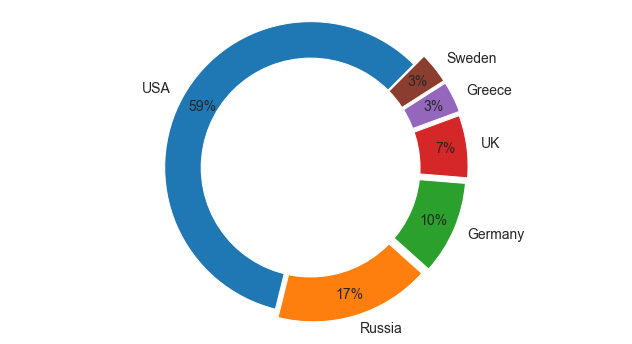

In [49]:
fig1, ax1 = plt.subplots()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8b3e2f']
explode = (0.0, 0.06, 0.07, 0.08, 0.09, 0.09)
ax1.pie(df_q12.region.value_counts(),
        colors=colors,
        explode=explode,
        labels=df_q12.region.value_counts().index,
        autopct='%.0f%%',
        pctdistance=0.85,
        labeldistance=1.1,
        startangle=45)
center_circle = plt.Circle((0, 0), 0.75, color='white')
ax1.add_artist(center_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

### 2. Questions related to athletes and number of medals
   2.1. Which athlete achieved most medals?  
   2.2. Which athlete achieved most Gold medals?  
   2.3. Breakdown of medals of athletes with most medals  
   2.4. Is there any athlete who won medals in different sports?

#### 2.1. Which athlete achieved most medals?

Extract a table `df_q21` from `df`, which contains 3 columns:  
1. ID of an athlete  
2. Name of the athlete  
3. The number of medals the athlete won  

In [58]:
df_q21 = sqldf('''
    SELECT ID, Name, COUNT(Medal) AS Medal_Counts
    FROM df
    WHERE (Season = 'Summer') AND (Medal <> 'None')
    GROUP BY ID, Name
    ORDER BY Medal_Counts DESC
    LIMIT 10
''')

Have a look at the first 10 rows of `df_q21`

In [59]:
df_q21

,ID,Name,Medal_Counts
0,94406,"Michael Fred Phelps, II",28
1,67046,Larysa Semenivna Latynina (Diriy-),18
2,4198,Nikolay Yefimovich Andrianov,15
3,74420,Edoardo Mangiarotti,13
4,89187,Takashi Ono,13
5,109161,Borys Anfiyanovych Shakhlin,13
6,23426,Natalie Anne Coughlin (-Hall),12
7,35550,Birgit Fischer-Schmidt,12
8,57998,Sawao Kato,12
9,70965,Ryan Steven Lochte,12


Create a bar chart showing top 10 athletes with most medals

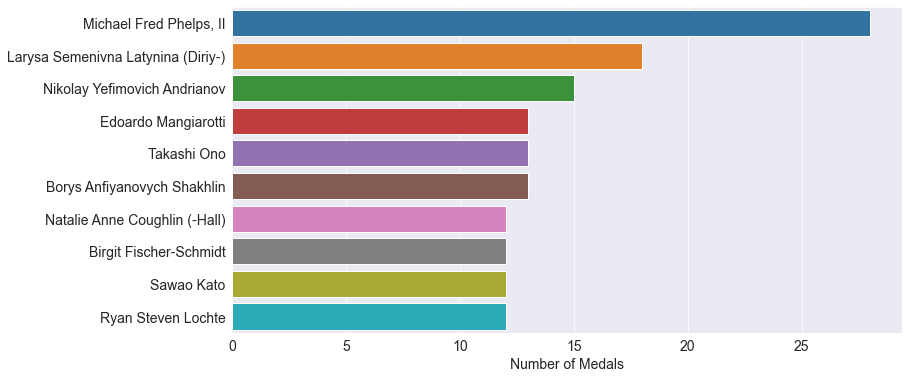

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_q21.Medal_Counts, y=df_q21.Name)
plt.xlabel('Number of Medals')
plt.ylabel(None)
plt.show()

#### 2.1. Which athlete achieved most Gold medals?

Extract a table `df_q22` from `df`, which contains 3 columns:  
1. ID of an athlete  
2. Name of the athlete  
3. The number of Gold medals the athlete won  

In [62]:
df_q22 = sqldf('''
    SELECT ID, Name, COUNT(Medal) AS Gold_Medal_Counts
    FROM df
    WHERE (Season = 'Summer') AND (Medal = 'Gold')
    GROUP BY ID, Name
    ORDER BY Gold_Medal_Counts DESC
    LIMIT 10
''')

Have a look at the first 10 rows of `df_q22`

In [63]:
df_q22

,ID,Name,Gold_Medal_Counts
0,94406,"Michael Fred Phelps, II",23
1,33557,"Raymond Clarence ""Ray"" Ewry",10
2,67046,Larysa Semenivna Latynina (Diriy-),9
3,69210,"Frederick Carlton ""Carl"" Lewis",9
4,87390,Paavo Johannes Nurmi,9
5,113912,Mark Andrew Spitz,9
6,11642,"Matthew Nicholas ""Matt"" Biondi",8
7,13029,Usain St. Leo Bolt,8
8,35550,Birgit Fischer-Schmidt,8
9,57998,Sawao Kato,8


Create a bar chart showing top 10 athletes with most Gold medals

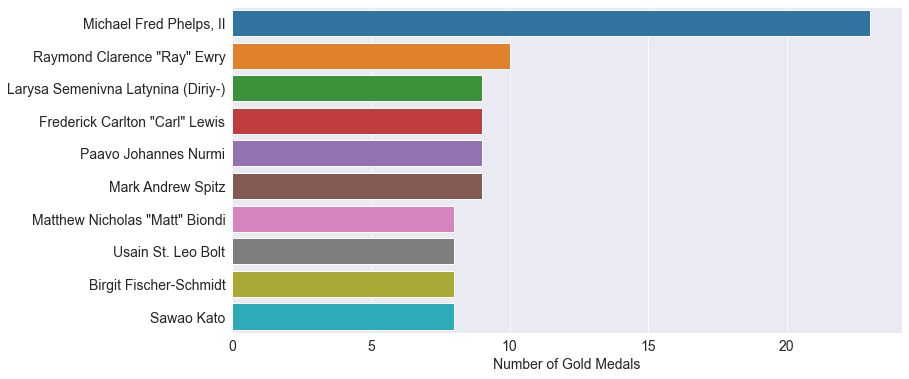

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_q22.Gold_Medal_Counts, y=df_q22.Name)
plt.xlabel('Number of Gold Medals')
plt.ylabel(None)
plt.show()

#### 2.3. Breakdown of medals of athletes with most medals  

Extract a table `df_Top` table from `df`, data of which are related to only Top 10 athletes with most medals

In [66]:
df_Top10 = df[df['ID'].isin(df_q21.ID.to_list())]

Extract a table `df_q23G` from `df`, which contains 3 columns:  
1. ID of an athlete  
2. Name of the athlete  
3. The number of Gold medals the athlete won  

In [67]:
df_q23G = sqldf('''
    SELECT ID, Name, COUNT(Medal) AS Gold_Medal_Counts
    FROM df_Top10
    WHERE (Season = 'Summer') AND (Medal = 'Gold')
    GROUP BY ID, Name
''')

Have a look at `df_q23G`

In [68]:
df_q23G

,ID,Name,Gold_Medal_Counts
0,4198,Nikolay Yefimovich Andrianov,7
1,23426,Natalie Anne Coughlin (-Hall),3
2,35550,Birgit Fischer-Schmidt,8
3,57998,Sawao Kato,8
4,67046,Larysa Semenivna Latynina (Diriy-),9
5,70965,Ryan Steven Lochte,6
6,74420,Edoardo Mangiarotti,6
7,89187,Takashi Ono,5
8,94406,"Michael Fred Phelps, II",23
9,109161,Borys Anfiyanovych Shakhlin,7


Extract a table `df_q23S` from `df`, which contains 3 columns:  
1. ID of an athlete  
2. Name of the athlete  
3. The number of Silver medals the athlete won  

In [1]:
df_q23S = sqldf('''
    SELECT ID, Name, COUNT(Medal) AS Silver_Medal_Counts
    FROM df_Top10
    WHERE (Season = 'Summer') AND (Medal = 'Silver')
    GROUP BY ID, Name
''')

NameError: name 'sqldf' is not defined

Have a look at `df_q23S`

In [70]:
df_q23S

,ID,Name,Silver_Medal_Counts
0,4198,Nikolay Yefimovich Andrianov,5
1,23426,Natalie Anne Coughlin (-Hall),4
2,35550,Birgit Fischer-Schmidt,4
3,57998,Sawao Kato,3
4,67046,Larysa Semenivna Latynina (Diriy-),5
5,70965,Ryan Steven Lochte,3
6,74420,Edoardo Mangiarotti,5
7,89187,Takashi Ono,4
8,94406,"Michael Fred Phelps, II",3
9,109161,Borys Anfiyanovych Shakhlin,4


Extract a table `df_q23B` from `df`, which contains 3 columns:  
1. ID of an athlete  
2. Name of the athlete  
3. The number of Bronze medals the athlete won  

In [71]:
df_q23B = sqldf('''
    SELECT ID, Name, COUNT(Medal) AS Bronze_Medal_Counts
    FROM df_Top10
    WHERE (Season = 'Summer') AND (Medal = 'Bronze')
    GROUP BY ID, Name
''')

Have a look at `df_q23B`

In [72]:
df_q23B

,ID,Name,Bronze_Medal_Counts
0,4198,Nikolay Yefimovich Andrianov,3
1,23426,Natalie Anne Coughlin (-Hall),5
2,57998,Sawao Kato,1
3,67046,Larysa Semenivna Latynina (Diriy-),4
4,70965,Ryan Steven Lochte,3
5,74420,Edoardo Mangiarotti,2
6,89187,Takashi Ono,4
7,94406,"Michael Fred Phelps, II",2
8,109161,Borys Anfiyanovych Shakhlin,2


Merger all tables created up to this point in this question using `ID` column as the key to get `df_q23` which contains information on the breakdown of medals of 10 athletes with most medals

In [73]:
df_q23 = sqldf('''
    SELECT q21.ID, q21.Name, Medal_Counts, Gold_Medal_Counts, Silver_Medal_Counts, Bronze_Medal_Counts
    FROM
        df_q21 AS q21
        LEFT JOIN df_q23G AS G ON q21.ID = G.ID
        LEFT JOIN df_q23S AS S ON q21.ID = S.ID
        LEFT JOIN df_q23B AS B ON q21.ID = B.ID
''')

Check data types and NULL values of `df_q23`

In [74]:
df_q23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10 non-null     int64  
 1   Name                 10 non-null     object 
 2   Medal_Counts         10 non-null     int64  
 3   Gold_Medal_Counts    10 non-null     int64  
 4   Silver_Medal_Counts  10 non-null     int64  
 5   Bronze_Medal_Counts  9 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 608.0+ bytes


***Comments:***
1. Data types: Data type of `Bronze_Medal_Counts` column can be changed to `int`
2. NULL values: NULL values of `Bronze_Medal_Counts` can be changed to `0`
3. Duplicated values: No problem

Process `df_q23`

In [76]:
df_q23.Bronze_Medal_Counts = df_q23.Bronze_Medal_Counts.fillna(0).astype('int')

Have a look at tidy `df_q23`

In [77]:
df_q23

,ID,Name,Medal_Counts,Gold_Medal_Counts,Silver_Medal_Counts,Bronze_Medal_Counts
0,94406,"Michael Fred Phelps, II",28,23,3,2
1,67046,Larysa Semenivna Latynina (Diriy-),18,9,5,4
2,4198,Nikolay Yefimovich Andrianov,15,7,5,3
3,74420,Edoardo Mangiarotti,13,6,5,2
4,89187,Takashi Ono,13,5,4,4
5,109161,Borys Anfiyanovych Shakhlin,13,7,4,2
6,23426,Natalie Anne Coughlin (-Hall),12,3,4,5
7,35550,Birgit Fischer-Schmidt,12,8,4,0
8,57998,Sawao Kato,12,8,3,1
9,70965,Ryan Steven Lochte,12,6,3,3


Plot a horizontal stacked bar chart to show the breakdown of the medals

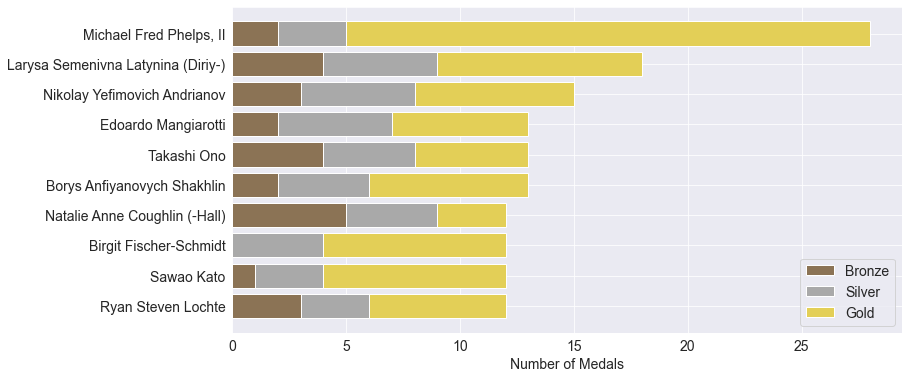

In [78]:
fig1, ax1 = plt.subplots()
ax1.barh(y=df_q23.Name[::-1], 
         width=df_q23.Bronze_Medal_Counts[::-1], 
         label='Bronze',
         color='#8b7355')
ax1.barh(y=df_q23.Name[::-1], 
         width=df_q23.Silver_Medal_Counts[::-1], 
         label='Silver', 
         left=df_q23.Bronze_Medal_Counts[::-1],
         color='#a9a9a9')
ax1.barh(y=df_q23.Name[::-1], 
         width=df_q23.Gold_Medal_Counts[::-1], 
         label='Gold', 
         left=df_q23.Silver_Medal_Counts[::-1]+df_q23.Bronze_Medal_Counts[::-1],
         color='#e3Cf57')
ax1.set_xlabel('Number of Medals')
ax1.legend()
fig1.set_figwidth(12)
fig1.set_figheight(6)
plt.show()

#### 2.4. Is there any athlete who won medals in different sports?

Extract a table `df_q24` from `df`, which contains 4 columns:  
1. ID of an athlete  
2. Name of the athlete
3. The number of different sports the athlete participated in
4. The number of medals the athlete won

In [80]:
df_q24 = sqldf('''
    SELECT ID, Name, COUNT(DISTINCT Sport) AS Number_Of_Sports, COUNT(Sport) AS Number_Of_Medals
    FROM df
    WHERE (Medal <> 'None') AND (Season = 'Summer')
    GROUP BY ID, Name
    HAVING COUNT(DISTINCT Sport) > 1
    ORDER BY Number_Of_Sports DESC, Number_Of_Medals DESC
''')

Have a look at the brief summary of `df_q24`

In [81]:
df_q24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                67 non-null     int64 
 1   Name              67 non-null     object
 2   Number_Of_Sports  67 non-null     int64 
 3   Number_Of_Medals  67 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ KB


Have a look at the first 5 rows of `df_q24`

In [82]:
df_q24.head()

,ID,Name,Number_Of_Sports,Number_Of_Medals
0,64683,Frank X. Kugler,3,4
1,68647,Eric Otto Valdemar Lemming,2,7
2,129469,"Peter Johann ""Johnny"" Weissmuller",2,6
3,53973,John Arthur Jarvis,2,6
4,129248,Karl Magnus Wegelius,2,5


***Comments:***
1. There are 67 athletes participating in at least 2 different types of sport and winning medals
2. Amongs these, the highest number of different types of sport is 3
3. Amongs these, the highest number of medals achieved is 7

### 3. Questions related to age/weight/height and number of medals?
3.1. In which age/weight/height range did athletes win medals?  
3.2. What sports did athletes at low-extreme of age/weight/height range win?  
3.3. What sports did athletes at high-extreme of age/weight/height range win?  
3.4. Relationship of Weight and Height of medalists

***Note:*** Both Winter and Summer events are taken into consideration under these questions

#### 3.1. In which age range did athletes win medals?

Have a look at the summary of `Age` column of medalists with `Age` larger than `0` (which is placeholder for previously NULL values) 

In [87]:
df.Age[(df.Age > 0) & (df.Medal != 'None')].describe()

count    39044.000000
mean        25.923112
std          5.910831
min         10.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         73.000000
Name: Age, dtype: float64

Create a histogram for `Age` column of medalists

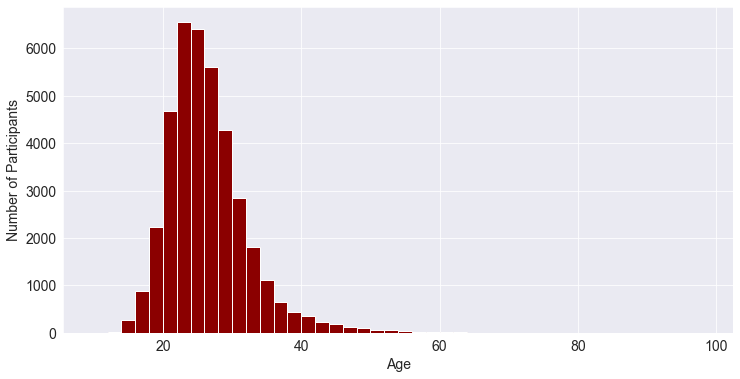

In [88]:
plt.figure(figsize=(12, 6))
counts, edges, plot = plt.hist(df.Age[(df.Age > 0) & (df.Medal != 'None')], 
                               bins = np.arange(10,100,2), 
                               color='darkred')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

Get the bin with most participants

In [89]:
edges[:len(edges)-1][counts == counts.max()]

array([22])

***Comments:***
1. 50% of the medalists are in age range of 22-29
2. The age bin of 22-24 has the highest number of medalists

#### 3.2. What sports did athletes at low-extreme of age range win?

Extract a table `Sport_low_age` with data on Top 5 sports in which most young participants won medals  
***Note:*** Participants are considered young when their age is smaller than 18 in this study

In [92]:
Sport_low_age = df.Sport[(df.Age < 18) & (df.Age > 0)].value_counts().head(5)
Sport_low_age

Swimming          4863
Gymnastics        3855
Athletics          542
Alpine Skiing      471
Figure Skating     362
Name: Sport, dtype: int64

Create a bar chart of `Sport_low_age`

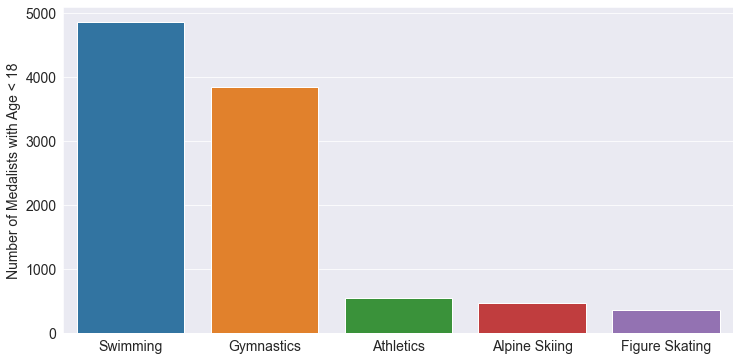

In [93]:
plt.figure(figsize=(12, 6))
sns.barplot(x = Sport_low_age.index, y = Sport_low_age)
plt.xlabel(None)
plt.ylabel('Number of Medalists')
plt.show()

***Comments:*** Young medalists dominate in *Swimming* and *Gymnastics*

#### 3.3. What sports did athletes at high-extreme of age range win?

Extract a table `Sport_high_age` with data on Top 5 sports in which most old participants won medals  
***Note:*** Participants are considered old when their age is greater than 50 in this study

In [96]:
Sport_high_age = df.Sport[df.Age >= 50].value_counts().head(5)
Sport_high_age

Art Competitions    600
Shooting            464
Equestrianism       299
Sailing             174
Archery              73
Name: Sport, dtype: int64

Create a bar chart of `Sport_high_age`

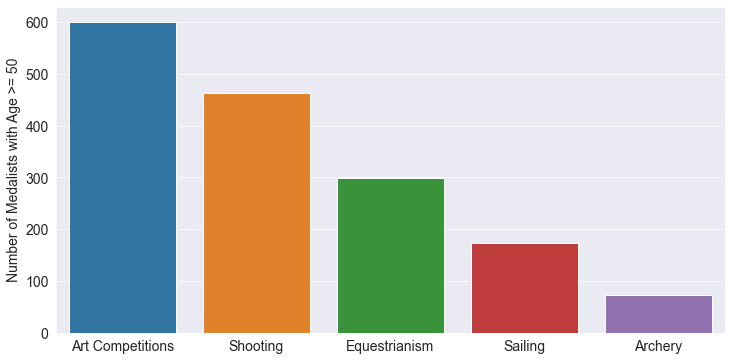

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x = Sport_high_age.index, y = Sport_high_age)
plt.xlabel(None)
plt.ylabel('Number of Medalists')
plt.show()

***Comments:*** Old medalists dominate in *Art Competitions* and *Shooting*

***Note:*** The same set of questions for `Weight` and `Height` can be answered in the same way as those for `Age` so readers can feel free to skip to **Question 3.10**

#### 3.4. In which weight range did athletes win medals?

Have a look at the summary of `Weight` column of medalists with `Weight` larger than `0` (which is placeholder for previously NULL values) 

In [100]:
# Look at the summary of 'Weight' column of medalists with Weight > 0 (which is placeholder for previously NULL values) 
df.Weight[(df.Weight > 0) & (df.Medal != 'None')].describe()

count    30456.000000
mean        73.770680
std         15.016025
min         28.000000
25%         63.000000
50%         73.000000
75%         83.000000
max        182.000000
Name: Weight, dtype: float64

Create a histogram for `Weight` column of medalists

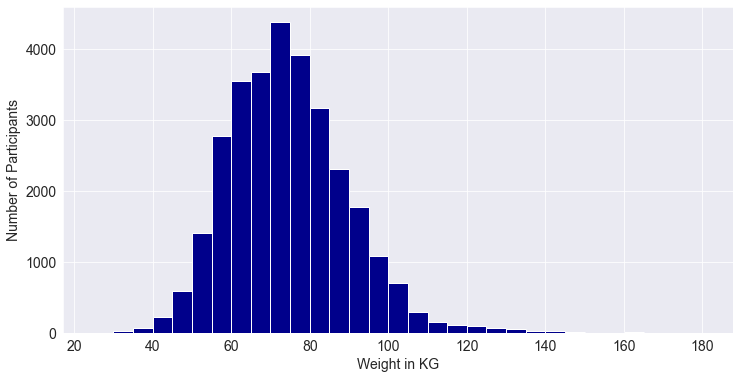

In [101]:
plt.figure(figsize=(12, 6))
counts, edges, plot = plt.hist(df.Weight[(df.Weight > 0) & (df.Medal != 'None')], 
                               bins = np.arange(25,185,5), 
                               color='darkblue')
plt.xlabel('Weight in KG')
plt.ylabel('Number of Participants')
plt.show()

Get the bin with most participants

In [102]:
edges[:len(edges)-1][counts == counts.max()]

array([70])

***Comments:***
1. 50% of the medalists are in weight range of 63-83kg
2. The weight bin of 70-75kg has the highest number of medalists

#### 3.5. What sports did athletes at low-extreme of weight range win?

Extract a table `Sport_light_weight` with data on Top 5 sports in which most light participants won medals  
***Note:*** Participants are considered light when their weight is smaller than 40kg in this study

In [105]:
Sport_light_weight = df.Sport[(df.Weight < 40) & (df.Weight > 0)].value_counts().head(5)
Sport_light_weight

Gymnastics             974
Rhythmic Gymnastics     22
Athletics               15
Figure Skating          12
Diving                   9
Name: Sport, dtype: int64

Create a bar chart of `Sport_light_weight`

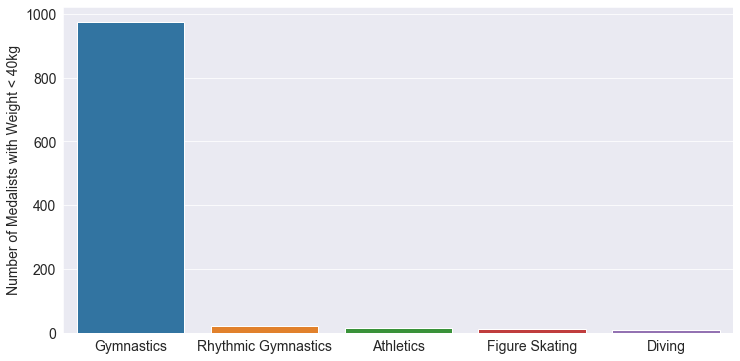

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(x = Sport_light_weight.index, y = Sport_light_weight)
plt.xlabel(None)
plt.ylabel('Number of Medalists')
plt.show()

***Comments:*** Light-weight medalists dominate in *Gymnastics*

#### 3.6. What sports did athletes at high-extreme of weight range win?

Extract a table `Sport_heavy_weight` with data on Top 5 sports in which most heavy participants won medals  
***Note:*** Participants are considered heavy when their weight is greater than 130 in this study

In [109]:
Sport_heavy_weight = df.Sport[df.Weight >= 130].value_counts().head(5)
Sport_heavy_weight

Athletics        186
Weightlifting    159
Judo             128
Wrestling        100
Basketball        26
Name: Sport, dtype: int64

Create a bar chart of `Sport_heavy_weight`

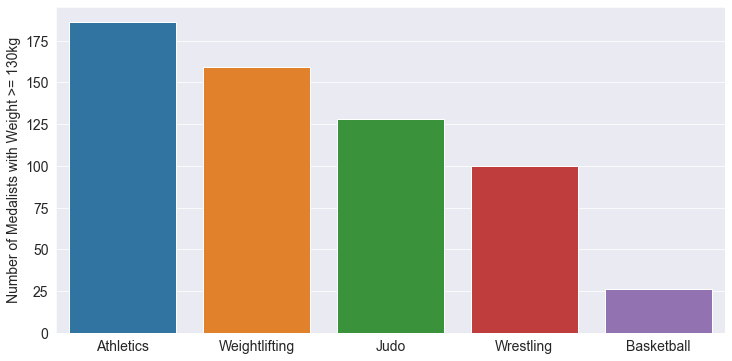

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(x = Sport_heavy_weight.index, y = Sport_heavy_weight)
plt.xlabel(None)
plt.ylabel('Number of Medalists')
plt.show()

***Comments:*** Heavy-weight medalists dominate in *Athletics, Weightlifting, Judo* and *Wrestling*

#### 3.7. In which height range did athletes win medals?

Have a look at the summary of `Height` column of medalists with `Height` larger than `0` (which is placeholder for previously NULL values) 

In [113]:
# Look at the summary of 'Height' column of medalists with Height > 0 (which is placeholder for previously NULL values) 
df.Height[(df.Height > 0) & (df.Medal != 'None')].describe()

count    31072.000000
mean       177.554197
std         10.893723
min        136.000000
25%        170.000000
50%        178.000000
75%        185.000000
max        223.000000
Name: Height, dtype: float64

Create a histogram for `Height` column of medalists

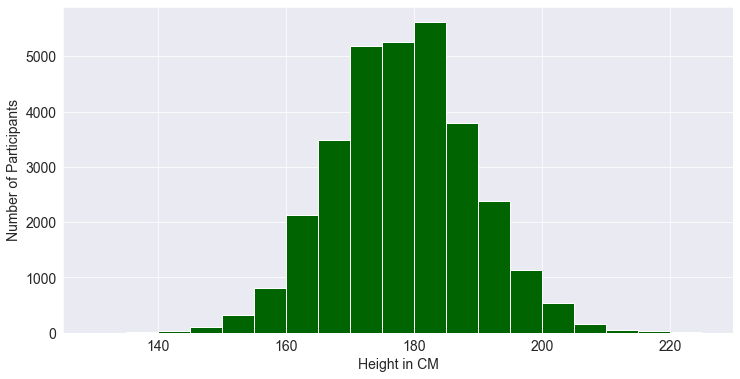

In [114]:
plt.figure(figsize=(12, 6))
counts, edges, plot = plt.hist(df.Height[(df.Height > 0) & (df.Medal != 'None')], 
                               bins = np.arange(130,230,5), 
                               color='darkgreen')
plt.xlabel('Height in CM')
plt.ylabel('Number of Participants')
plt.show()

Get the bin with most participants

In [115]:
edges[:len(edges)-1][counts == counts.max()]

array([180])

***Comments:***
1. 50% of the medalists are in height range of 170-185cm
2. The height bin of 180-185cm has the highest number of medalists

#### 3.8. What sports did athletes at low-extreme of height range win?

Extract a table `Sport_low_height` with data on Top 5 sports in which most short participants won medals  
***Note:*** Participants are considered short when their height is smaller than 150cm in this study

In [118]:
Sport_low_height = df.Sport[(df.Height < 150) & (df.Height > 0)].value_counts().head(5)
Sport_low_height

Gymnastics        1203
Weightlifting       58
Athletics           34
Diving              26
Figure Skating      26
Name: Sport, dtype: int64

Create a bar chart of `Sport_low_height`

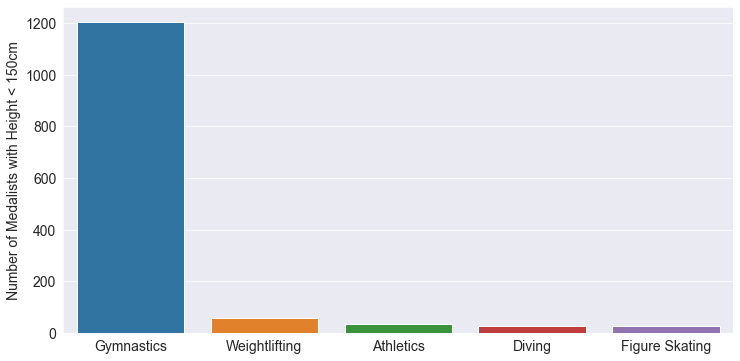

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(x = Sport_low_height.index, y = Sport_low_height)
plt.xlabel(None)
plt.ylabel('Number of Medalists')
plt.show()

***Comments:*** Low-height medalists dominate in *Gymnastics*

#### 3.9. What sports did athletes at high-extreme of height range win?

Extract a table `Sport_high_height` with data on Top 5 sports in which most high participants won medals  
***Note:*** Participants are considered high when their height is greater than 200cm in this study

In [122]:
Sport_high_height = df.Sport[df.Height > 200].value_counts().head(5)
Sport_high_height

Basketball    803
Volleyball    325
Swimming      158
Rowing        156
Athletics     131
Name: Sport, dtype: int64

Create a bar chart of `Sport_high_height`

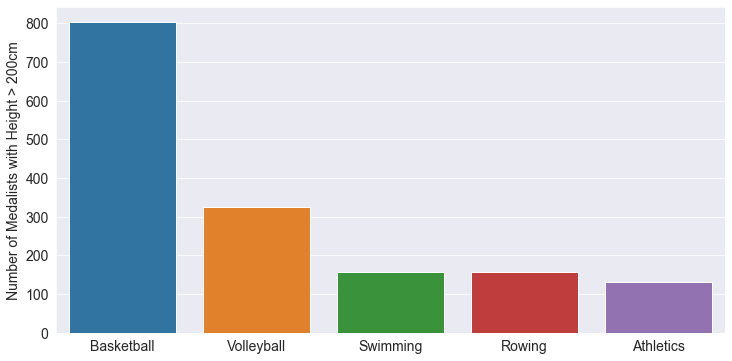

In [123]:
plt.figure(figsize=(12, 6))
sns.barplot(x = Sport_high_height.index, y = Sport_high_height)
plt.xlabel(None)
plt.ylabel('Number of Medalists')
plt.show()

***Comments:*** High-height medalists dominate in *Basketball* and *Volleyball*

#### 3.10. Relationship of Weight and Height of medalists

Create a scatter plot using `Height` on x-axis and `Weight` on y-axis and `Sex` as colors of points to have a sense of the relationship between `Weight` and `Height` of medalists  

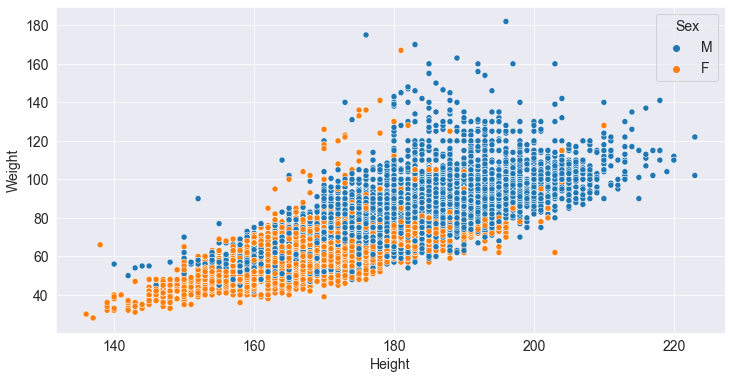

In [126]:
cond = (df.Height > 0) & (df.Weight > 0) & (df.Age > 0) & (df.Medal != 'None')
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df.Height[cond],
                y = df.Weight[cond],
                hue = df.Sex[cond])
plt.show()

***Comment:***
1. There is a positive linear correlation between `Weight` and `Height` of medalists
2. `Sex` also has an influence on `Weight` because as can be seen from the plot, there is a obvious pattern of colors determined by `Sex`

### 4. Questions related to regions and number of events that regions participated in
4.1. Which region partcipated in highest number of events?  
4.2. Relationship between number of events and number of medals

***Note:*** Both Winter and Summer events are taken into consideration under these questions

#### 4.1. Which region partcipated in highest number of events?

Extract a table `df_q41` from `df`, which has 2 columns:
1. Name of a region
2. The number of events in which the region participated 

In [130]:
df_q41 = sqldf('''
    SELECT region, COUNT(Event) AS Number_of_Events
    FROM df
    GROUP BY region
    ORDER BY COUNT(Event) DESC
''')

Have a look at the first 5 rows of `df_q41`

In [131]:
df_q41.head()

,region,Number_of_Events
0,USA,18604
1,Germany,15787
2,France,12551
3,UK,12115
4,Russia,11692


Create a bar chart using the first 5 rows of `df_q41`

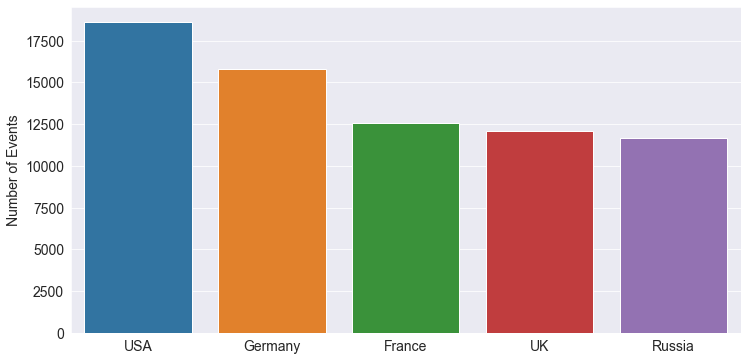

In [132]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_q41.head().region, y=df_q41.head().Number_of_Events)
plt.xlabel(None)
plt.ylabel('Number of Events')
plt.show()

***Comments:*** Top 5 regions with the highest number of events are *USA, Germany, France, UK* and *Russia*

#### 4.2. Relationship between number of events and number of medals

Extract a table `df_q42` from `df`, which has 2 columns:
1. Name of a region
2. The number of medals won by the region

In [135]:
df_q42 = sqldf('''
    SELECT region, COUNT(Event) AS Number_of_Medals
    FROM df
    WHERE Medal <> 'None'
    GROUP BY region
    ORDER BY COUNT(Event) DESC
''')

Update `df_q42` by merging `df_q41` into `df_q42` using `region` column as the key

In [ ]:
df_q42 = pd.merge(df_q41, df_q42, on='region', how='left')

Have a look at the first 5 rows of `df_q42`

In [136]:
df_q42.head()

,region,Number_of_Events,Number_of_Medals
0,USA,18604,5637.0
1,Germany,15787,3756.0
2,France,12551,1767.0
3,UK,12115,2067.0
4,Russia,11692,3947.0


Create a scatter plot using `df_q42` with `Number_of_Events` on x-axis and `Number_of_Medal` on y_axis

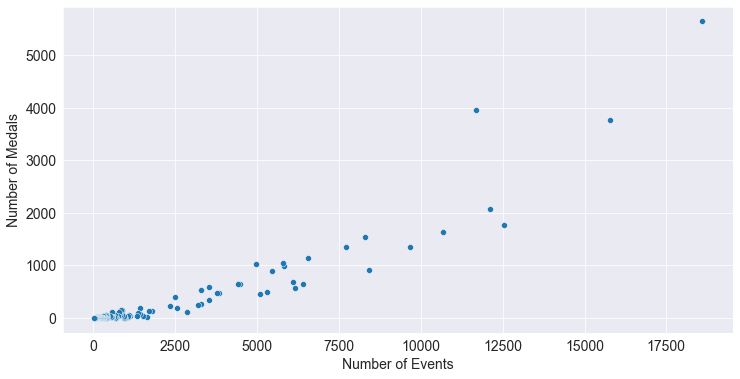

In [137]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_q42.Number_of_Events, y=df_q42.Number_of_Medals)
plt.xlabel('Number of Events')
plt.ylabel('Number of Medals')
plt.show()

***Comments:*** 
1. There is a positive correlation between Number of Events and Number of Medals
2. There seems to be a break in the linear model at `Number_of_Events` of 2500 so a spline linear model can be built using this breakpoint

### 5. Questions related to genders and number of events that athletes participated in
5.1. Is there any change in gender trend?  
5.2. What sport were females/males dominant in?

#### 5.1. Is there any change in gender trend?

Extract two table `df_q51_M` and `df_q52_F` from df, each of which has 2 columns:
1. Year of the event
2. The number of male or female participants in that year 

In [141]:
df_q51_M = sqldf('''
    SELECT Year, COUNT(DISTINCT ID) AS Male
    FROM df
    WHERE (Season = 'Summer') AND (Sex = 'M')
    GROUP BY Year
    ORDER BY Year
''')
df_q51_F = sqldf('''
    SELECT Year, COUNT(DISTINCT ID) AS Female
    FROM df
    WHERE (Season = 'Summer') AND (Sex = 'F')
    GROUP BY Year
    ORDER BY Year
''')

Merge `df_q51_M` and `df_q51_F` to get `df_q51` using `Year` column as the key

In [ ]:
df_q51 = pd.merge(df_q51_M, df_q51_F, on='Year', how='left')

Check data type and NULL values of `df_q51`

In [142]:
df_q51.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    29 non-null     int64  
 1   Male    29 non-null     int64  
 2   Female  28 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 928.0 bytes


***Comment:***
1. Data type: Data type of `Female` can be changed to `int`
2. NULL values: NULL values of `Female` can be replaced by `0`
3. Duplicated values: No problem

Process `df_q51`

In [144]:
df_q51.Female = df_q51.Female.fillna(0).astype('int')

Add 2 columns to `df_q51`, which are
1. `Total` column which is the sum of `Male` and `Female` columns
2. `Percent_of_Female` column which is the percent of `Female` participants in a certain year

In [145]:
df_q51['Total'] = df_q51.Female + df_q51.Male
df_q51['Percent_of_Female'] = df_q51.Female/df_q51.Total*100

Plot a line chart to show the trend of contribution of female participants throughout the period of 1896-2016

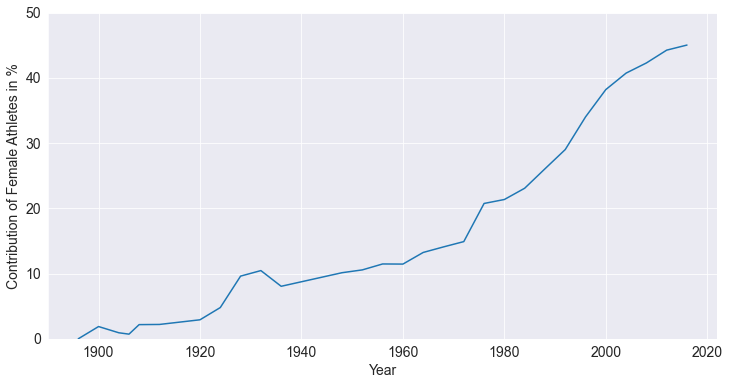

In [146]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_q51.Year, y=df_q51.Percent_of_Female)
plt.xlabel('Year')
plt.ylabel('Contribution of Female Athletes in %')
plt.ylim([0, 50])
plt.show()

***Comments:*** There has been an increase trend in contribution of female athletes

Plot a stacked area chart to show the trend of the total number of the participants and their breakdown in terms of gender throughout the period of 1896-2016 

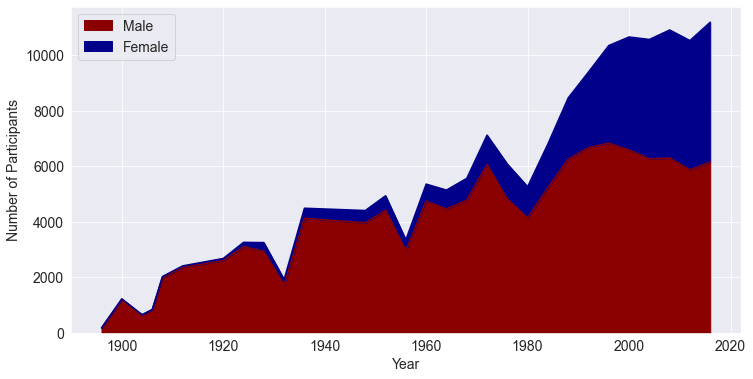

In [148]:
df_q51[['Year', 'Male', 'Female']].plot.area(x='Year', figsize=(12, 6), color=['darkred','darkblue'])
plt.ylabel('Number of Participants')
plt.show()

***Comments:*** 
1. There has been an increasing trend in total number of athletes 
2. Once again, there has been an increasing trend in contribution of of female athletes

#### 5.2. What sport were females/males dominant in?

Extract two tables `df_q52_F` and `df_q52_M` from `df`, each of which has 2 columns:
1. Type of sport which females or males participated in
2. The number of females or males participated in that type of sport

In [151]:
df_q52_F = sqldf('''
    SELECT Sport, COUNT(Sport) AS Counts
    FROM df
    WHERE (Season = 'Summer') AND (Sex = 'F')
    GROUP BY Sport
    ORDER By Counts DESC
    LIMIT 5
''')
df_q52_M = sqldf('''
    SELECT Sport, COUNT(Sport) AS Counts
    FROM df
    WHERE (Season = 'Summer') AND (Sex = 'M')
    GROUP BY Sport
    ORDER By Counts DESC
    LIMIT 5
''')

Have a look at top 5 sports in `df_q52_M` and `df_q52_F`

In [152]:
df_q52_M

,Sport,Counts
0,Athletics,26958
1,Gymnastics,17578
2,Swimming,13345
3,Shooting,9724
4,Cycling,9433


In [153]:
df_q52_F

,Sport,Counts
0,Athletics,11666
1,Swimming,9850
2,Gymnastics,9129
3,Rowing,2193
4,Fencing,2000


Plot dual bar charts to show the comparison between `df_q52_F` and `df_q52_M`

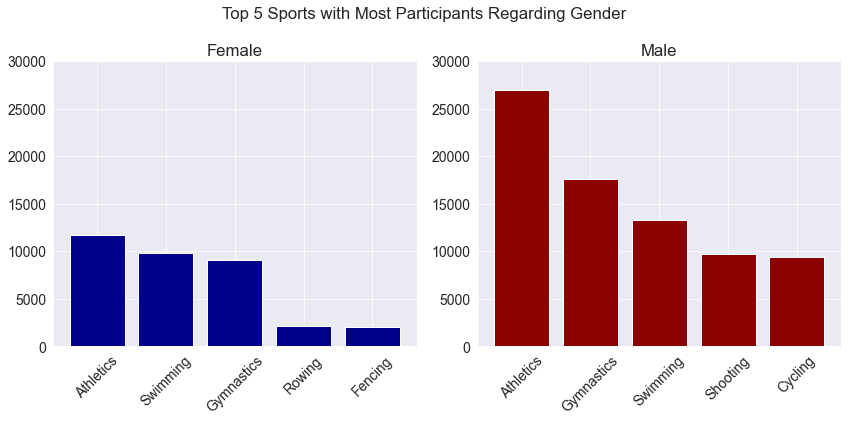

In [154]:
fig, axs = plt.subplots(1, 2)

axs[0].bar(x=df_q52_F.Sport, height=df_q52_F.Counts, color='darkblue')
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_ylim([0, 30000])
axs[0].set_title('Female')

axs[1].bar(x=df_q52_M.Sport, height=df_q52_M.Counts, color='darkred')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_ylim([0, 30000])
axs[1].set_title('Male')

fig.suptitle('Top 5 Sports with Most Participants Regarding Gender')
fig.set_figwidth(12)
fig.set_figheight(6)

plt.tight_layout()
plt.show()

***Comments:*** 
1. *Athletics, Swimming* and *Gymnastics* are sports in which participants of both genders participated most
2. The y axis limit in both plots are the same so the number of females is smaller than the number of males regarding these 3 sports